Exercise 5-1

In the BRFSS, the distribution of heights is roughly normal with parameters mu = 178 cm and sigma = 7.7 cm for men, and mu = 163 cm and sigma = 7.3 cm for women.

In order to join Blue Man Group, you have yo be male and between 5'10" and 6'1" tall.

What percentage of the US male population is in this range? 

In [20]:
from scipy.stats import norm

# Given parameters for male height distribution
mu = 178  # mean height for men in cm
sigma = 7.7  # standard deviation in cm

# Height range for Blue Man Group in cm
lower_bound = 177.8  # 5'10"
upper_bound = 185.4  # 6'1"

# Calculate the cumulative probabilities
p_upper = norm.cdf(upper_bound, loc=mu, scale=sigma)
p_lower = norm.cdf(lower_bound, loc=mu, scale=sigma)

# Calculate the percentage of the population in the range
percentage_in_range = (p_upper - p_lower) * 100

# Print the result
print(f"The percentage of the U.S. male population in the height range of 5'10\" to 6'1\" is approximately {percentage_in_range:.2f}%.")




The percentage of the U.S. male population in the height range of 5'10" to 6'1" is approximately 34.21%.


Exercise 5-2

To get a feel for the Pareto distribution, let's see how different the world would be if the distribution of human height were Pareto. With parameters Xm = 1 m and alpha = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m. 

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

The mean human height in Pareto world is 2.43 meters.
The fraction of the population shorter than the mean is 0.78.
The number of people expected to be taller than 1 km is approximately 55603.
The expected height of the tallest person is approximately 618349.68 meters.


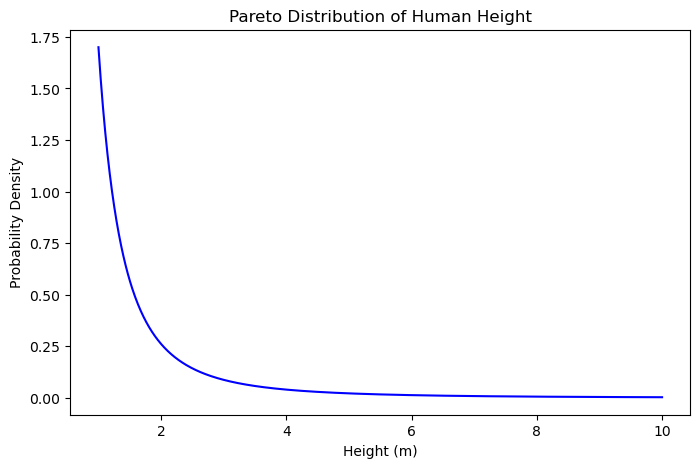

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Given parameters
alpha = 1.7
xmin = 1 

# 1. Plot the Pareto distribution
x = np.linspace(xmin, 10, 1000)  # Generate x values from 1 to 10 meters
pdf = pareto.pdf(x, alpha, scale=xmin)  # Calculate PDF

plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label="Pareto Distribution (alpha=1.7, xmin=1)", color="blue")
plt.title("Pareto Distribution of Human Height")
plt.xlabel("Height (m)")
plt.ylabel("Probability Density")

# 2. Calculate the mean human height in Pareto world
mean_height = alpha * xmin / (alpha - 1)
print(f"The mean human height in Pareto world is {mean_height:.2f} meters.")

# 3. Fraction of population shorter than the mean
fraction_shorter = pareto.cdf(mean_height, alpha, scale=xmin)
print(f"The fraction of the population shorter than the mean is {fraction_shorter:.2f}.")

# 4. Number of people taller than 1 km
population = 7e9  # 7 billion people
height_1km = 1000  # 1 km in meters
prob_taller_1km = 1 - pareto.cdf(height_1km, alpha, scale=xmin)
people_taller_1km = prob_taller_1km * population
print(f"The number of people expected to be taller than 1 km is approximately {people_taller_1km:.0f}.")

# 5. Expected tallest person
expected_tallest = xmin * (population ** (1 / alpha))
print(f"The expected height of the tallest person is approximately {expected_tallest:.2f} meters.")

Exercise 6-1.

The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from the Census Bureau’s website. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under $5000.” The highest range includes respondents who made “$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame.

It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log₁₀ dollars. The default value, log_upper=6.0, represents the assumption that the largest income among the respondents is 10⁶, or one million dollars.

InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log₁₀ scale.

Compute the median, mean, skewness, and Pearson’s skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?

Mean: 74278.70753118755
Median: 51226.45447894046
Skewness: 4.949920244429584
Pearson Median Skewness: 0.736125801914185
Probability at Mean: 0.660005879566872


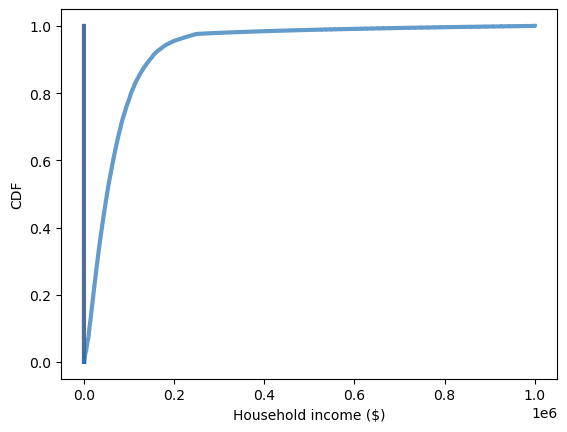

In [113]:
import numpy as np
import thinkstats2
import thinkplot
import hinc

def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # Compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # Get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # Plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # Use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # Collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

 
# Load the income data
income_df = hinc.ReadData()

# Generate the log-transformed sample
log_sample = InterpolateSample(income_df, log_upper=6.0)

# Plot the log CDF
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)', ylabel='CDF')

# Convert log sample to actual income values
sample = np.power(10, log_sample)

# Plot the actual income CDF
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)', ylabel='CDF')

# Calculate statistics for the sample
mean = cdf.Mean()
median = cdf.Percentile(50)  # Use Percentile(50) to get the median
std_dev = np.std(sample)  # Standard deviation of the sample

# Pearson's Median Skewness
pearson_median_skewness = 3 * (mean - median) / std_dev

# Output the results
print("Mean:", mean)
print("Median:", median)
print("Skewness:", skew(sample))  # Skewness from scipy
print("Pearson Median Skewness:", pearson_median_skewness)
print("Probability at Mean:", cdf.Prob(mean))


About 66% of households report taxable income below the mean. This fraction depends on the assumed upper bound; higher upper bounds reduce it, while lower bounds increase it due to distribution shape.